<a href="https://colab.research.google.com/github/lucasnofear/Deep-Learning-with-Python-Practice/blob/Keras-and-Tensorflow/ch3_4_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 2s 0us/step


In [0]:
train_data[0],train_labels[0]

Decode one of the review back to English


In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

1646592/1641221 [==============================] - 1s 1us/step


In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Encoding the integer sequences into a binary matrix

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension= 10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results
# lost the sequence in the vectorization
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
# vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

The model definition

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
# compile the model and pick loss function and optimizer
from keras import optimizers # allow you to configure optimizer
from keras import losses # custom losses
from keras import metrics # custom metrics

model.compile(optimizer = optimizers.RMSprop(lr=0.01),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

Setting aside a validation set

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training model

In [18]:
model.compile(optimizer = 'rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 145us/step - loss: 2.9312e-06 - acc: 1.0000 - val_loss: 1.6864 - val_acc: 0.8668
Epoch 2/20
15000/15000 [==============================] - 1s 95us/step - loss: 8.9685e-07 - acc: 1.0000 - val_loss: 1.7935 - val_acc: 0.8678
Epoch 3/20
15000/15000 [==============================] - 1s 95us/step - loss: 4.2014e-07 - acc: 1.0000 - val_loss: 1.8886 - val_acc: 0.8673
Epoch 4/20
15000/15000 [==============================] - 1s 95us/step - loss: 2.1850e-07 - acc: 1.0000 - val_loss: 1.9607 - val_acc: 0.8675
Epoch 5/20
15000/15000 [==============================] - 1s 93us/step - loss: 1.2577e-07 - acc: 1.0000 - val_loss: 2.0356 - val_acc: 0.8676
Epoch 6/20
15000/15000 [==============================] - 1s 93us/step - loss: 7.6739e-08 - acc: 1.0000 - val_loss: 2.0987 - val_acc: 0.8674
Epoch 7/20
15000/15000 [==============================] - 1s 93us/step - loss: 5.0790e-08 - acc: 1.0000

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Plotting the training and validation loss

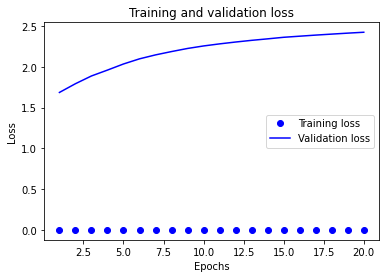

In [23]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plot the training and validation accuracy

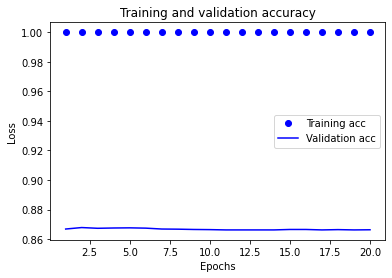

In [26]:
plt.clf() # clears the figure
acc_values = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# run into overfitting.

In [27]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 127us/step - loss: 0.7759 - acc: 0.9449
Epoch 2/4
25000/25000 [==============================] - 2s 66us/step - loss: 0.4180 - acc: 0.9473
Epoch 3/4
25000/25000 [==============================] - 2s 66us/step - loss: 0.2474 - acc: 0.9535
Epoch 4/4
25000/25000 [==============================] - 2s 62us/step


In [28]:
results

[0.5455396549892425, 0.8483200073242188]

Predict the likelyhood of reviews being positive

In [29]:
model.predict(x_test)

array([[0.13484997],
       [1.        ],
       [0.99723244],
       ...,
       [0.04441482],
       [0.10958162],
       [0.74347055]], dtype=float32)

Try one hidden layer

In [30]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.4840 - acc: 0.8047 - val_loss: 0.3739 - val_acc: 0.8755
Epoch 2/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.3040 - acc: 0.9063 - val_loss: 0.3097 - val_acc: 0.8866
Epoch 3/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.2344 - acc: 0.9257 - val_loss: 0.2881 - val_acc: 0.8880
Epoch 4/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1936 - acc: 0.9415 - val_loss: 0.3054 - val_acc: 0.8765
Epoch 5/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1639 - acc: 0.9522 - val_loss: 0.2762 - val_acc: 0.8889
Epoch 6/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1414 - acc: 0.9583 - val_loss: 0.2949 - val_acc: 0.8793
Epoch 7/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1246 - acc: 0.9646 - val_loss: 0.2866 - val_ac

# one hidden layers train faster, not as good

try using larger hidden layers (64 units)


In [31]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.4691 - acc: 0.7997 - val_loss: 0.3571 - val_acc: 0.8648
Epoch 2/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.2718 - acc: 0.9085 - val_loss: 0.3073 - val_acc: 0.8759
Epoch 3/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.2030 - acc: 0.9351 - val_loss: 0.3255 - val_acc: 0.8667
Epoch 4/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1646 - acc: 0.9461 - val_loss: 0.2772 - val_acc: 0.8904
Epoch 5/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1343 - acc: 0.9589 - val_loss: 0.2833 - val_acc: 0.8883
Epoch 6/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1155 - acc: 0.9646 - val_loss: 0.2963 - val_acc: 0.8844
Epoch 7/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.0929 - acc: 0.9725 - val_loss: 0.3124 - 

more hidden units also don't help the training. train slow

try using mse loss function

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss='mse',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.1539 - acc: 0.7977 - val_loss: 0.1073 - val_acc: 0.8708
Epoch 2/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.0807 - acc: 0.9102 - val_loss: 0.0890 - val_acc: 0.8891
Epoch 3/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.0600 - acc: 0.9327 - val_loss: 0.0834 - val_acc: 0.8920
Epoch 4/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.0468 - acc: 0.9505 - val_loss: 0.0838 - val_acc: 0.8883
Epoch 5/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.0379 - acc: 0.9616 - val_loss: 0.0917 - val_acc: 0.8760
Epoch 6/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.0328 - acc: 0.9690 - val_loss: 0.0860 - val_acc: 0.8829
Epoch 7/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.0260 - acc: 0.9754 - val_loss: 0.0866 - 

try using tanh acitivation function

In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.4749 - acc: 0.8017 - val_loss: 0.3420 - val_acc: 0.8787
Epoch 2/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.2660 - acc: 0.9107 - val_loss: 0.2991 - val_acc: 0.8811
Epoch 3/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1964 - acc: 0.9321 - val_loss: 0.2747 - val_acc: 0.8903
Epoch 4/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1510 - acc: 0.9495 - val_loss: 0.2868 - val_acc: 0.8870
Epoch 5/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1236 - acc: 0.9579 - val_loss: 0.3117 - val_acc: 0.8820
Epoch 6/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.0941 - acc: 0.9701 - val_loss: 0.3574 - val_acc: 0.8728
Epoch 7/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.0790 - acc: 0.9752 - val_loss: 0.3621 - 